In [ ]:
import logging
import os
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from google.colab import drive
import tensorflow as tf
drive.mount('/content/drive')
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

train_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_train_input.npy')
train_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_train_target.npy')
dev_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_validation_input.npy')
dev_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_validation_target.npy')
test_X = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_test_input.npy')
test_Y = np.load('/content/drive/Shared drives/CS 539 Project/reference/data_test_target.npy')



print("Training X shape: " + str(train_X.shape))
print("Training Y shape: " + str(train_Y.shape))
print("Dev X shape: " + str(dev_X.shape))
print("Dev Y shape: " + str(dev_Y.shape))
print("Test X shape: " + str(test_X.shape))
print("Test Y shape: " + str(test_Y.shape))

Mounted at /content/drive
Training X shape: (420, 128, 33)
Training Y shape: (420, 8)
Dev X shape: (120, 128, 33)
Dev Y shape: (120, 8)
Test X shape: (60, 128, 33)
Test Y shape: (60, 8)


In [ ]:

WORKING_DIR = '/content/drive/Shared drives/CS 539 Project/gtzan.zip (Unzipped Files)/DataTL'
TRAIN_DIR = '/content/drive/Shared drives/CS 539 Project/gtzan.zip (Unzipped Files)/DataTL/images_original'
VAL_DIR = '/content/drive/Shared drives/CS 539 Project/gtzan.zip (Unzipped Files)/DataTL/val'


In [ ]:
# NO NEED TO RUN
error here caused to avoid running

from glob import glob
from sklearn.model_selection import train_test_split

## Randomly Split data into training and validation
# This code randomly chooses 75% and 25% of the MerchData to be set 
# as training and validation data, creates a train and a val folder.
rock = glob(TRAIN_DIR + '/rock/*.png')
reggae = glob(TRAIN_DIR + '/reggae/*.png')
pop = glob(TRAIN_DIR + '/pop/*.png')
metal = glob(TRAIN_DIR + '/metal/*.png')
jazz = glob(TRAIN_DIR + '/jazz/*.png')
hiphop = glob(TRAIN_DIR + '/hiphop/*.png')
disco = glob(TRAIN_DIR + '/disco/*.png')
country = glob(TRAIN_DIR + '/country/*.png')
classical = glob(TRAIN_DIR + '/classical/*.png')
blues = glob(TRAIN_DIR + '/blues/*.png')

# The *_val variables contain the filenames of the files chosen for validation. 
rock_train, rock_val = train_test_split(rock, test_size=0.25)
reggae_train, reggae_val = train_test_split(reggae, test_size=0.25)
pop_train, pop_val = train_test_split(pop, test_size=0.25)
metal_train, metal_val = train_test_split(metal, test_size=0.25)
jazz_train, jazz_val = train_test_split(jazz, test_size=0.25)
hiphop_train, hiphop_val = train_test_split(hiphop, test_size=0.25)
disco_train, disco_val = train_test_split(disco, test_size=0.25)
country_train, country_val = train_test_split(country, test_size=0.25)
classical_train, classical_val = train_test_split(classical, test_size=0.25)
blues_train, blues_val = train_test_split(blues, test_size=0.25)

# This code moves the validation files out of the train directory and over to 
# the val directory.
os.makedirs(os.path.join(VAL_DIR,'rock'))
for file in rock_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'reggae'))
for file in reggae_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'pop'))
for file in pop_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'metal'))
for file in metal_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'jazz'))
for file in jazz_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'hiphop'))
for file in hiphop_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'disco'))
for file in disco_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'country'))
for file in country_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'classical'))
for file in classical_val:
  os.rename(file, file.replace('images_original','val'))
os.makedirs(os.path.join(VAL_DIR,'blues'))
for file in blues_val:
  os.rename(file, file.replace('images_original','val'))


Found 729 images belonging to 10 classes.
Found 244 images belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


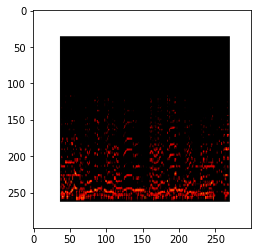

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


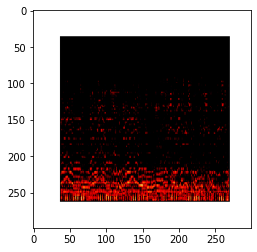

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


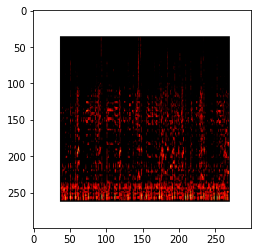

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


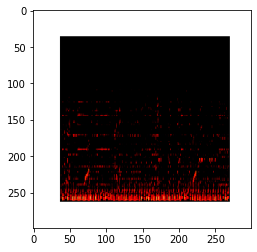

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


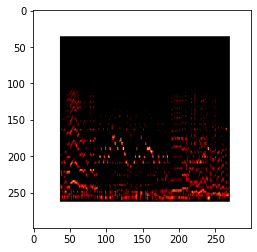

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


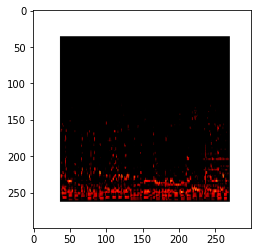

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


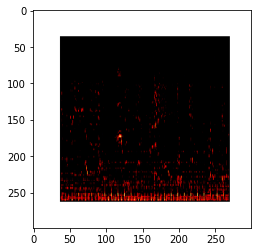

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


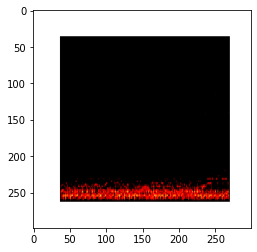

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


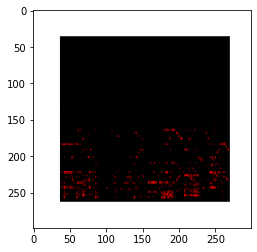

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(11, 299, 299, 3)


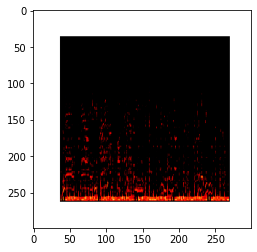

In [ ]:
!rm -rf train/.ipynb_checkpoints
!rm -rf val/.ipynb_checkpoints

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 11

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=0,
    zoom_range=[1,1],
    horizontal_flip=False,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=0,
    zoom_range=[1,1],
    horizontal_flip=False,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

for i in range(10):
  img, label = train_generator.next()
  print(img.shape)   #  (11,299,299,3)
  plt.imshow(img[0])
  plt.show()

In [ ]:
# CREATE MODEL & COMPILE
from keras.utils.vis_utils import plot_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D

input_shape = (train_X.shape[1], train_X.shape[2])

#base_model = ResNet50(weights='imagenet', include_top=False)
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output                          # The output layer of the googleNet
x = Conv2D(32, (3, 3), padding='same')(x)
x = Conv2D(8, (3, 3), padding='same')(x)
x = GlobalAveragePooling2D(name='avg_pool')(x) # This layer is used to downsample the features
x = Dropout(0.4)(x)                            # This layer is used to enforce feature redundancy 

numClass = 10
predictions = Dense(numClass, activation='softmax')(x)
#
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False # Set this to True if you want to re-train the entire network.
  
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#model.compile(optimizer='rmsprop',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

#print("Build LSTM RNN model ...")
#model = Sequential()

#model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
#model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.25, return_sequences=True, input_shape=input_shape))
#model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
#model.add(Dense(units=train_Y.shape[1], activation="softmax"))

#opt = Adam()
#model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
EPOCHS = 30
BATCH_SIZE = 11
STEPS_PER_EPOCH = 25
VALIDATION_STEPS = 1
MODEL_FILE = os.path.join(WORKING_DIR,'model')

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/30
25/25 [==============================] - 261s 10s/step - loss: 2.5699 - accuracy: 0.1091 - val_loss: 2.2227 - val_accuracy: 0.2727
Epoch 2/30
25/25 [==============================] - 255s 10s/step - loss: 2.3105 - accuracy: 0.1782 - val_loss: 2.0896 - val_accuracy: 0.0909
Epoch 3/30
25/25 [==============================] - 254s 10s/step - loss: 2.0732 - accuracy: 0.2582 - val_loss: 1.8716 - val_accuracy: 0.3636
Epoch 4/30
25/25 [==============================] - 246s 10s/step - loss: 2.0765 - accuracy: 0.2809 - val_loss: 2.0782 - val_accuracy: 0.1818
Epoch 5/30
25/25 [==============================] - 252s 10s/step - loss: 1.9949 - accuracy: 0.3091 - val_loss: 1.8933 - val_accuracy: 0.2727
Epoch 6/30
25/25 [==============================] - 252s 10s/step - loss: 1.9533 - accuracy: 0.3382 - val_loss: 1.9602 - val_accuracy: 0.1818
Epoch 7/30
25/25 [==============================] - 254s 10s/step - loss: 1.9175 - accuracy: 0.3273 - val_loss: 1.6765 - val_accuracy: 0.3636
Epoch 

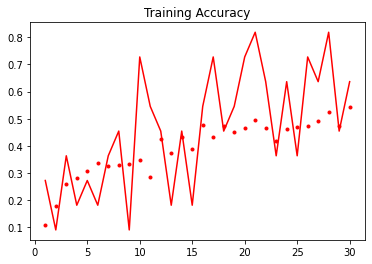

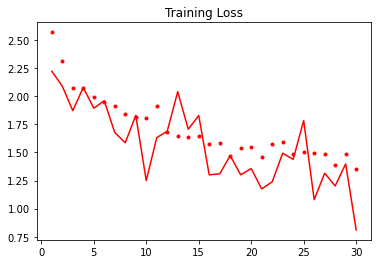

In [ ]:
# Validation & Testing
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, val_acc,'r')
plt.plot(epochs, acc,'r.')
plt.title("Training Accuracy")

plt.figure()
plt.plot(epochs, val_loss,'r')
plt.plot(epochs,loss,'r.')
plt.title("Training Loss")
plt.show()

In [ ]:
import pprint
pprint.pprint(history.params)
pprint.pprint(history.history)
pprint.pprint(history.epoch)


{'epochs': 30, 'steps': 25, 'verbose': 1}
{'accuracy': [0.1090909093618393,
              0.17818181216716766,
              0.2581818103790283,
              0.2808988690376282,
              0.30909091234207153,
              0.33818182349205017,
              0.3272727131843567,
              0.3309091031551361,
              0.3333333432674408,
              0.34909090399742126,
              0.28727272152900696,
              0.4254545569419861,
              0.3745318353176117,
              0.43272727727890015,
              0.389090895652771,
              0.4756554365158081,
              0.4344569146633148,
              0.4727272689342499,
              0.4509090781211853,
              0.46441948413848877,
              0.49454545974731445,
              0.4654545485973358,
              0.41818180680274963,
              0.4618181884288788,
              0.46909090876579285,
              0.47191011905670166,
              0.4906367063522339,
              0.52363634109497

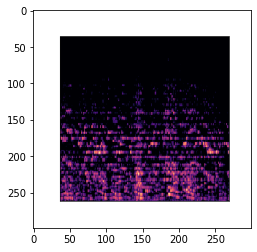

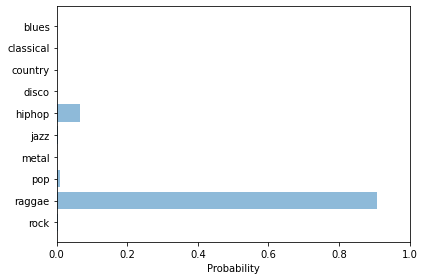

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Predict pre-processes the input so that it matches the format expected by the 
# network, then runs model.predict which provides the class predictions
def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]

# We plot the original image
plt.figure()
img = image.load_img('/content/drive/Shared drives/CS 539 Project/gtzan.zip (Unzipped Files)/DataTL/classical00000.png', target_size=(HEIGHT, WIDTH))
preds = predict(load_model(MODEL_FILE), img)
plt.imshow(img)

# We can visualize the predicted likelihood of each class
plt.figure()
labels = ["rock", "raggae","pop","metal","jazz", "hiphop", "disco", "country", "classical", "blues"] #THE ORDER OF THESE SHOULD BE ALPHABETICAL THE OTHER DIRECTION
plt.barh(range(10),preds,alpha=0.5)
plt.yticks(range(10),labels)
plt.xlabel('Probability')
plt.xlim(0,1)
plt.tight_layout()
plt.show()

In [ ]:
# Confusion Matrix - OLD & UNUSED
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(test_X)
matrix = confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(matrix)
disp.plot()


ValueError: ignored

In [ ]:
# Creates a HDF5 file 'lstm_genre_classifier.h5'
model_filename = "/content/drive/Shared drives/CS 539 Project/genre_classifier_lstm_wednesday.h5"
print("\nSaving model: " + model_filename)
model.save(model_filename)
# Creates a json file
model_json = model.to_json()
f = open("/content/drive/Shared drives/CS 539 Project/genre_classifier_lstm_wednesday.json", "w")
f.write(model_json)
f.close()



Saving model: /content/drive/Shared drives/CS 539 Project/genre_classifier_lstm_wednesday.h5
